In [16]:
#Step 1: Data Collection
import pandas as pd

In [17]:
# data for a company and its sector peers
data = pd.DataFrame({
    'Company': ['Diebold Nixdorf inc', 'Mind C.T.I ltd', 'Surgepays inc', 'Yalla Groups ltd ADR'],
    'Sector': ['Technology', 'Technology', 'Technology', 'Technology'],
    'Gross Profit': [891.6, 891.6, 876.2, 778.5],  # in millions
    'Gross Profit Growth': [12.54977521,-5.560382276,175.7575758,7.665964173],     # in percentage
    'Market Capitalization': [3.45, 38.17, 59.59, 595.54], #  the first value is in billion and others in millions
    'P/E': [0.88, 7.57, 2.63, 6.33], # in percentage
    'P/B': [1.57, 1.83, 1.06, 1.18] # in percentage
})

print(data)


                Company      Sector  Gross Profit  Gross Profit Growth  \
0   Diebold Nixdorf inc  Technology         891.6            12.549775   
1        Mind C.T.I ltd  Technology         891.6            -5.560382   
2         Surgepays inc  Technology         876.2           175.757576   
3  Yalla Groups ltd ADR  Technology         778.5             7.665964   

   Market Capitalization   P/E   P/B  
0                   3.45  0.88  1.57  
1                  38.17  7.57  1.83  
2                  59.59  2.63  1.06  
3                 595.54  6.33  1.18  


In [18]:
#Step 2: Comparative Analysis
#Compare the Gross Profit and Gross Profit Growth
#We'll compare the gross profit and gross profit growth of the chosen company (Diebold Nixdort inc) with its peers.

import matplotlib.pyplot as plt

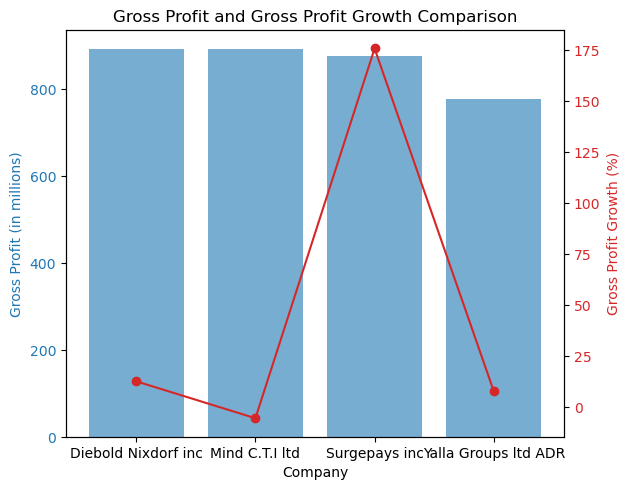

In [19]:
# Plotting GP and GPG for comparison
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Company')
ax1.set_ylabel('Gross Profit (in millions)', color=color)
ax1.bar(data['Company'], data['Gross Profit'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Gross Profit Growth (%)', color=color)
ax2.plot(data['Company'], data['Gross Profit Growth'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.title('Gross Profit and Gross Profit Growth Comparison')
plt.show()

In [20]:
#Step 3: Valuation Model
#Project the Company’s Value in Four Years
#We'll create a model to project the company's value in four years based on current GP, GPG, and sector trends.
from sklearn.linear_model import LinearRegression
import numpy as np

In [21]:
# Using Gross Profit and Gross Profit Growth to predict Market Capitalization
# Prepare the data
X = data[['Gross Profit', 'Gross Profit Growth']]
y = data['Market Capitalization']

# Train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [22]:
# Predict the market capitalization for the next four years
years = 4
future_gross_profit = data['Gross Profit'] * (1 + data['Gross Profit Growth'] / 100) ** years
future_gpg = data['Gross Profit Growth']

future_data = pd.DataFrame({
    'Gross Profit': future_gross_profit,
    'Gross Profit Growth': future_gpg
})
future_market_cap = model.predict(future_data)
data['Projected Market Cap (4 years)'] = future_market_cap

print(data)

                Company      Sector  Gross Profit  Gross Profit Growth  \
0   Diebold Nixdorf inc  Technology         891.6            12.549775   
1        Mind C.T.I ltd  Technology         891.6            -5.560382   
2         Surgepays inc  Technology         876.2           175.757576   
3  Yalla Groups ltd ADR  Technology         778.5             7.665964   

   Market Capitalization   P/E   P/B  Projected Market Cap (4 years)  
0                   3.45  0.88  1.57                    -2722.769201  
1                  38.17  7.57  1.83                      951.305442  
2                  59.59  2.63  1.06                  -253190.008756  
3                 595.54  6.33  1.18                     -765.348587  


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [24]:
# Step 1: Data Collection
data = pd.DataFrame({
    'Company': ['Diebold Nixdorf inc', 'Mind C.T.I ltd', 'Surgepays inc', 'Yalla Groups ltd ADR'],
    'Sector': ['Technology', 'Technology', 'Technology', 'Technology'],
    'Gross Profit': [891.6, 891.6, 876.2, 778.5],  # in millions
    'Gross Profit Growth': [12.55, -5.56, 175.76, 7.67],  # in percentage
    'Market Capitalization': [3.45, 38.17, 59.59, 595.54]  # in billions/millions
})


In [25]:
# Additional variable: Technological Advancements impact on Gross Profit Growth (hypothetical values)
technological_advancements = [1.5, 1.2, 1.8, 1.3]  # assuming an impact factor on Gross Profit Growth

# Adjust Gross Profit Growth based on Technological Advancements
data['Adjusted Gross Profit Growth'] = data['Gross Profit Growth'] * technological_advancements


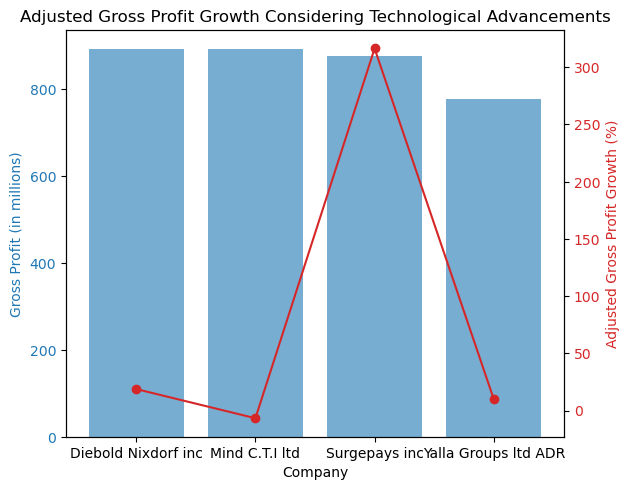

In [26]:
# Step 2: Comparative Analysis - Plotting GP and GPG for comparison
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Company')
ax1.set_ylabel('Gross Profit (in millions)', color=color)
ax1.bar(data['Company'], data['Gross Profit'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Adjusted Gross Profit Growth (%)', color=color)
ax2.plot(data['Company'], data['Adjusted Gross Profit Growth'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Adjusted Gross Profit Growth Considering Technological Advancements')
plt.show()

In [27]:
# Step 3: Valuation Model - Projecting the Company’s Value in Four Years
# Prepare the data
X = data[['Gross Profit', 'Adjusted Gross Profit Growth']]
y = data['Market Capitalization']

# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
# Predict the market capitalization for the next four years
years = 4
future_gross_profit = data['Gross Profit'] * (1 + data['Adjusted Gross Profit Growth'] / 100) ** years
future_gpg = data['Adjusted Gross Profit Growth']

future_data = pd.DataFrame({
    'Gross Profit': future_gross_profit,
    'Adjusted Gross Profit Growth': future_gpg
})
future_market_cap = model.predict(future_data)
data['Projected Market Cap (4 years)'] = future_market_cap


In [29]:
# Assessing impact on Diebold Nixdorf inc's valuation
diebold_index = 0  # assuming Diebold Nixdorf inc is the first company in the DataFrame
initial_market_cap = data.loc[diebold_index, 'Market Capitalization']
projected_market_cap = data.loc[diebold_index, 'Projected Market Cap (4 years)']

impact_percentage = ((projected_market_cap - initial_market_cap) / initial_market_cap) * 100

In [30]:
print("Step 3: Valuation Model - Projected Market Capitalization in Four Years (Including Technological Advancements)")
print(data)
print("\nAssessment:")
print(f"The projected Market Capitalization for Diebold Nixdorf inc in 4 years is ${projected_market_cap:.2f} million.")
print(f"This represents an impact of {impact_percentage:.2f}% on Diebold Nixdorf inc's valuation due to technological advancements.")

Step 3: Valuation Model - Projected Market Capitalization in Four Years (Including Technological Advancements)
                Company      Sector  Gross Profit  Gross Profit Growth  \
0   Diebold Nixdorf inc  Technology         891.6                12.55   
1        Mind C.T.I ltd  Technology         891.6                -5.56   
2         Surgepays inc  Technology         876.2               175.76   
3  Yalla Groups ltd ADR  Technology         778.5                 7.67   

   Market Capitalization  Adjusted Gross Profit Growth  \
0                   3.45                        18.825   
1                  38.17                        -6.672   
2                  59.59                       316.368   
3                 595.54                         9.971   

   Projected Market Cap (4 years)  
0                   -4.483035e+03  
1                    1.116776e+03  
2                   -1.333987e+06  
3                   -1.234612e+03  

Assessment:
The projected Market Capitalizatio